# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Food_Hub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# command to return rows and columns
# f is used to evaluate expressions in {}
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 1898 rows and 9 columns.


#### Observations:

The dataframe has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# info() is used to print a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The datatypes of the different columns in the dataset are: int64, object, and float64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# check for missing values in the DataFrame df
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

The isnull() checks for any missing values in the data. We have no missing values in this dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Select the column 'food_preparation_time' from the data frame and save it to food_time
food_time = df['food_preparation_time']

# get the minimum, average, and maximum time for food preparation time
minimum_time = food_time.min()
average_time = food_time.mean()
maximum_time = food_time.max()

# Print the results
print(f"Minimum Food Prep Time: {minimum_time}")
print(f"Average Food Prep Time: {average_time:.2f}")
print(f"Maximum Food Prep Time: {maximum_time}")
print('\n')

# this is a full statistical summary for the column food_preparation_time
food_summary = food_time.describe()
print("Statistical summary for food preparation time column:")
print(food_summary)

Minimum Food Prep Time: 20
Average Food Prep Time: 27.37
Maximum Food Prep Time: 35


Statistical summary for food preparation time column:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations:
The minimum time it takes food to be prepared once an order is placed is 20 minutes.

The average time it takes food to be prepared once an order is placed is 27.37 minutes.

The maximum time it takes food to be prepared once an order is placed is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Display unique values and their frequency. This is helpful to show and make sure that only 'not given' is used to determine an unrated oder.
examine_rating = df['rating'].value_counts(dropna=False)
print(examine_rating)

# Count how many orders have 'not given' as the rating
unrated_count = (df['rating'] == 'Not given').sum()

# Print the result
print('\n')
print(f"Number of food orders that are not rated is: {unrated_count}")

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


Number of food orders that are not rated is: 736


#### Observations:
The number of orders that are not rated is 736. They were filled with 'Not given' as shown when we examined the rating column in our data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

1) First variable: order_id is unique for each order, it doesn't provide much for our analysis

2) Second variable: customer_id A countplot here helps visualize the distribution of orders per customer. for example looking at the histogram here we can tell that almost 800 customers ordered 1 order only.

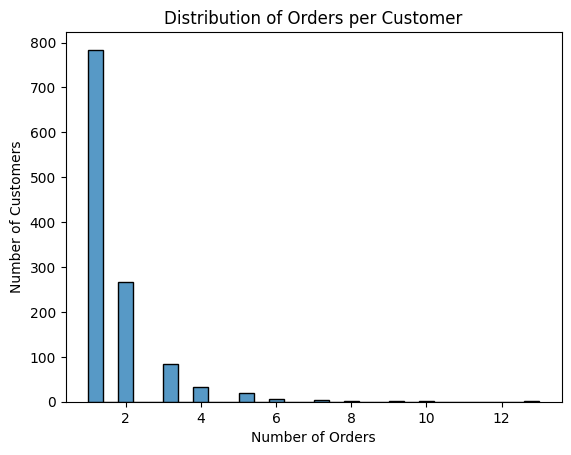

In [ ]:
# Count the number of orders per customer
order_counts = df['customer_id'].value_counts()

# Plot the distribution of order counts
sns.histplot(order_counts, bins=30)  # change the number of bins for better visualization
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

3) Third variable: restaurant_name. here a barplot will help identify which restaurants are most popular by number of orders. I picked the top restaurants in order to have a better visualization for the data. Showing them all in this case messed up the plot. We can clearly see that Shake Shack has the most amount of orders

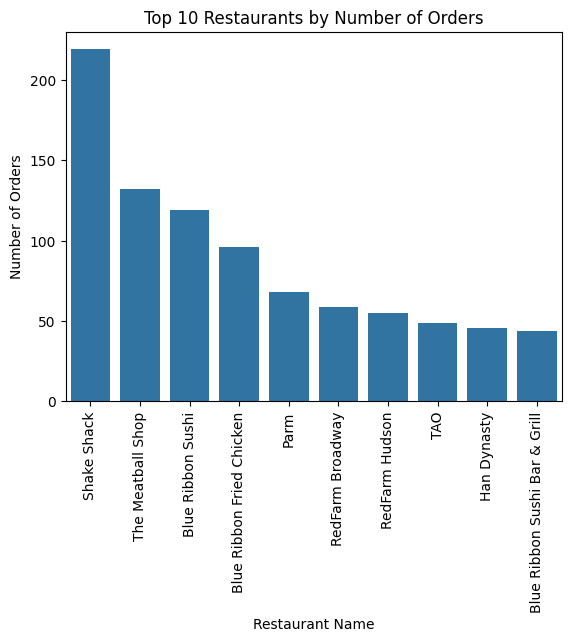

In [ ]:
# Get the top 10 most frequent restaurants
top_restaurants = df['restaurant_name'].value_counts().head(10)

# Plot top 10 restaurants using barplot
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)
plt.title('Top 10 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

4) Fourth variable: cuisine_type. using a countplot here helps see which types of cuisine are most ordered. we can clearly tell that the American cuisine followed by the Japanese are the two most favorable cuisines in this dataframe

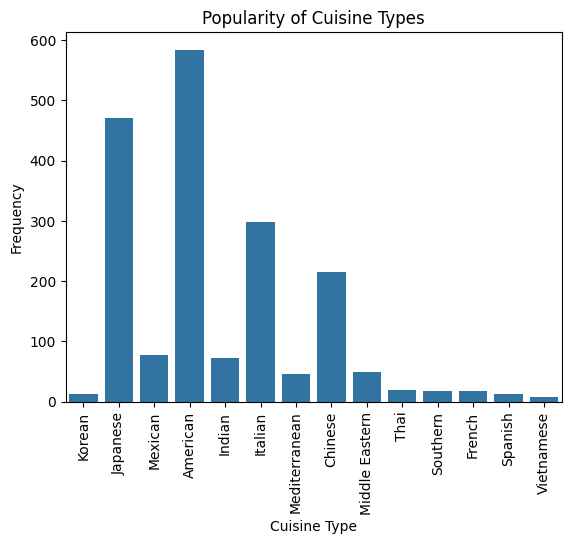

In [ ]:
# countplot for frequency of orders by cuisine type
sns.countplot(x=df['cuisine_type'])
plt.title('Popularity of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


5) Fifth variable: cost_of_the_order. Histograms and boxplots can be used here to understand the distribution of order costs, including the average order cost, range, and outliers. The plots here shows us clearly that orders around 13 or 14 dollars have the highest frequency.

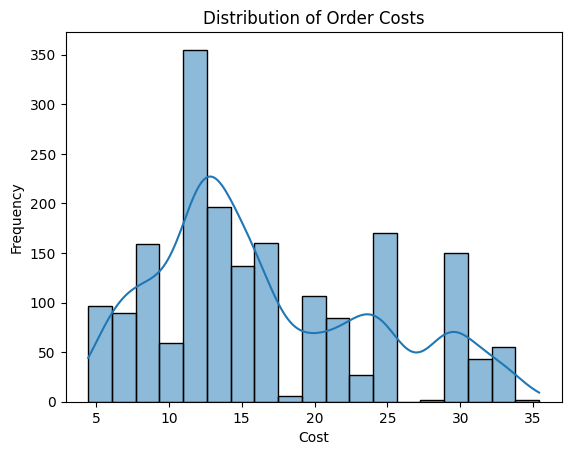

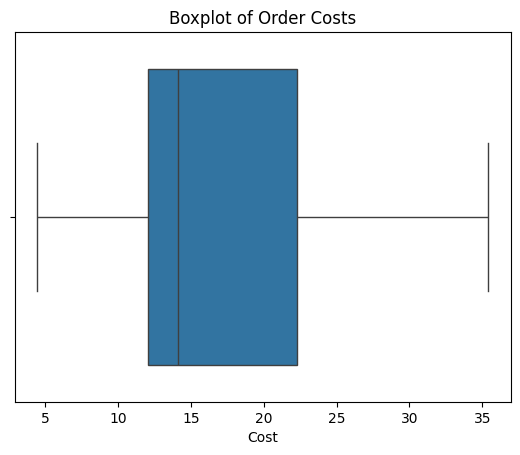

In [ ]:
# histogram for distribution of orders based on their cost
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()
print('\n')
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Boxplot of Order Costs')
plt.xlabel('Cost')
plt.show()

 6)Sixth variable: day_of_the_week. a countplot here can help us determine the frequency of orders on weekdays vs. weekends. The countplot below clearly shows us that the order count is way higher on weekends compared to weekdays.

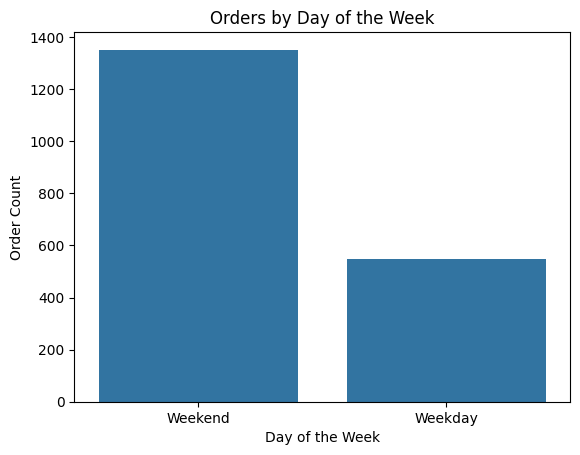

In [ ]:
# countplot showing the frequency of orders on weekdays vs. weekends
sns.countplot(x=df['day_of_the_week'])
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.show()

7) Seventh variable: rating. a countplot here helps visualize the distribution of ratings, mainly we need this for understanding customer satisfaction. The countplot shows us that almost 600 orders have rating of 5 which most definitely tell us customers would be coming back. we can almost be pretty sure about orders with 4 star rating. The plot also shows us a big number over 700 of unrated orders.

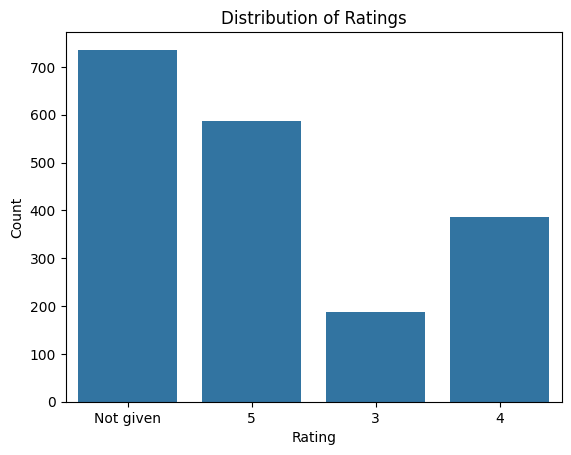

In [ ]:
sns.countplot(x=df['rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

8) Eighth variable: food_preparation_time. a histogram and boxplot can be used here to see how long it takes for food to be prepared. both the histogram and the boxplot here helps us understand the frequency of orders based on their preparation time. we can clearly see that the mean is around 27 minutes, while a lot of orders sit in the 20 minutes mark, 26 minutes, 31, and 34 minutes.

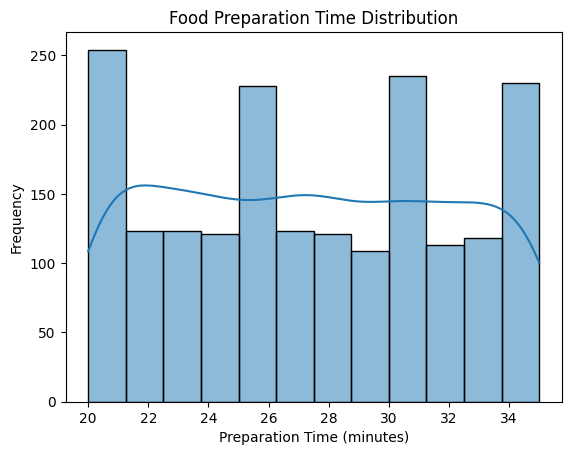

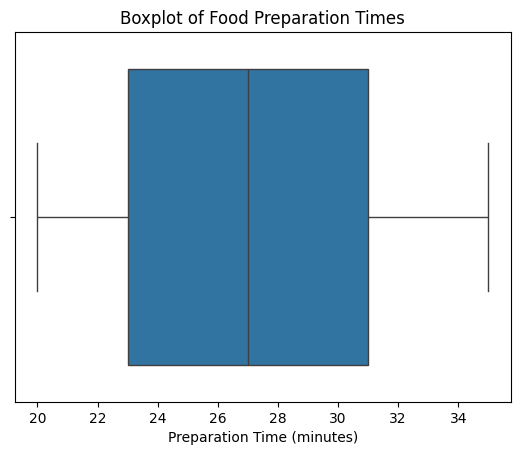

In [ ]:
# histogram
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Food Preparation Time Distribution')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()
print('\n')
# boxplot
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Times')
plt.xlabel('Preparation Time (minutes)')
plt.show()

9) Ninth and last variable: delivery_time. a histogram and boxplot here helps us analyze the delivery times. we can clearly see here the average delivery time is sitting at almost 25 minutes with most orders ranging between 20 and 28 minutes.

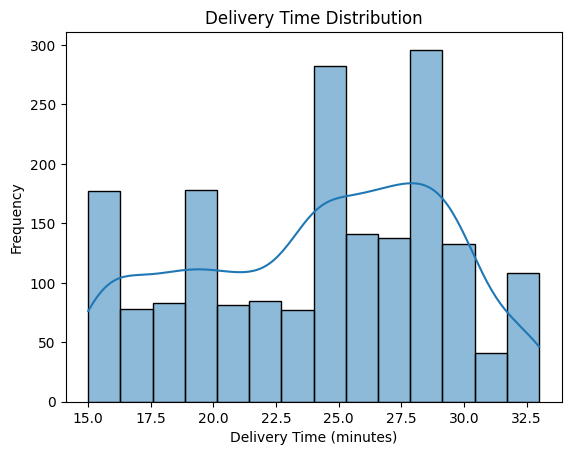

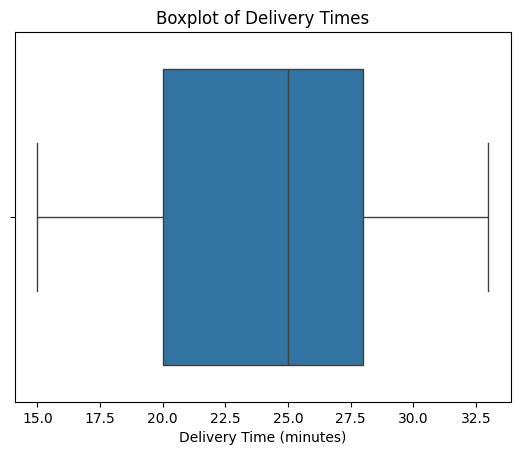

In [ ]:
# histogram
sns.histplot(df['delivery_time'], kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()
print('\n')
# boxplot
sns.boxplot(x=df['delivery_time'])
plt.title('Boxplot of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Count the orders per restaurant and select the top 5
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

# print top 5 restaurants
print("Top 5 restaurants by number of orders:")
print(top_5_restaurants)

Top 5 restaurants by number of orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


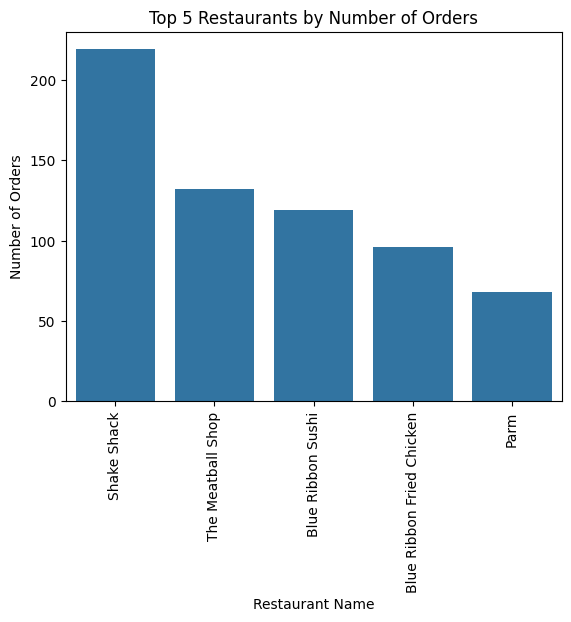

In [ ]:
# plotting the top 5 restaurants in a bar plot
sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values)
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotating the labels for better readability
plt.show()

#### Observations:
The top 5 restaurants in terms of the number of orders received are:

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# gather from the DataFrame for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# count the occurrences of each cuisine type on weekends
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts()

# Get the most popular cuisine
# idxmax() looks through the values to locate the highest number.
most_popular_cuisine = popular_cuisine_weekend.idxmax()

# print the most popular cuisine on weekends
print(f"The most popular cuisine on weekends is: {most_popular_cuisine}")

The most popular cuisine on weekends is: American


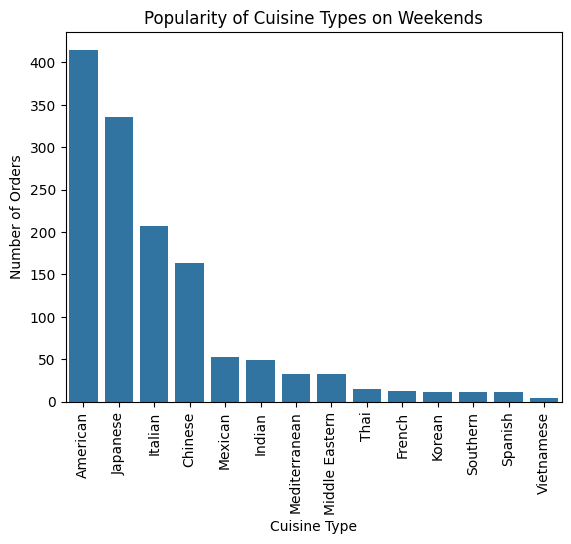

In [ ]:
# plot for the cuisine popularity on weekends
sns.barplot(x=popular_cuisine_weekend.index, y=popular_cuisine_weekend.values)
plt.title('Popularity of Cuisine Types on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotating the labels for better readability
plt.show()

#### Observations:
The most popular cuisine on weekends is the American Cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# gather orders where the cost is more than $20
orders_above_20 = df[df['cost_of_the_order'] > 20]

# count the number of orders more than $20
count_orders_above_20 = orders_above_20.shape[0]

# calculate the total number of orders. shape[0] is used to get the number of rows in this dataframe, which represents the number of orders
total_orders = df.shape[0]

# calculate the percentage of orders more than $20
percentage_above_20 = (count_orders_above_20 / total_orders) * 100

# print the result. .2f to show only 2 numbers after the decimal
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:
The percentage of the orders cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# print the mean delivery time
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# count the number of orders per customer
customer_order_counts = df['customer_id'].value_counts()

# select the top 3 most frequent customers
top_3_customers = customer_order_counts.head(3)

# print the IDs of the top 3 customers and the number of orders they placed
print("Top 3 most frequent customer IDs and the number of orders they placed:")
print(top_3_customers)

Top 3 most frequent customer IDs and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


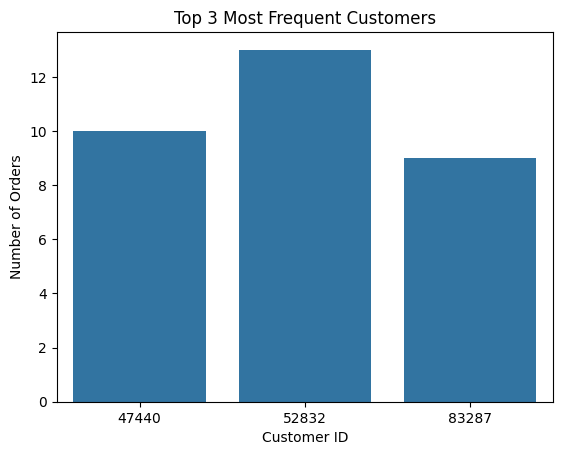

In [ ]:
# the barplot here helps us clearly see the top 3 customer IDs by number of orders ordered
sns.barplot(x=top_3_customers.index, y=top_3_customers.values)
plt.title('Top 3 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

#### Observations:
The top 3 most frequent customers (customer_id) that will get 20% discount vouchers based on the amount of orders they ordered are:

1. ID Number: 52832 with 13 orders
2. ID Number: 47440 with 10 orders
3. ID Number: 83287 with 09 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


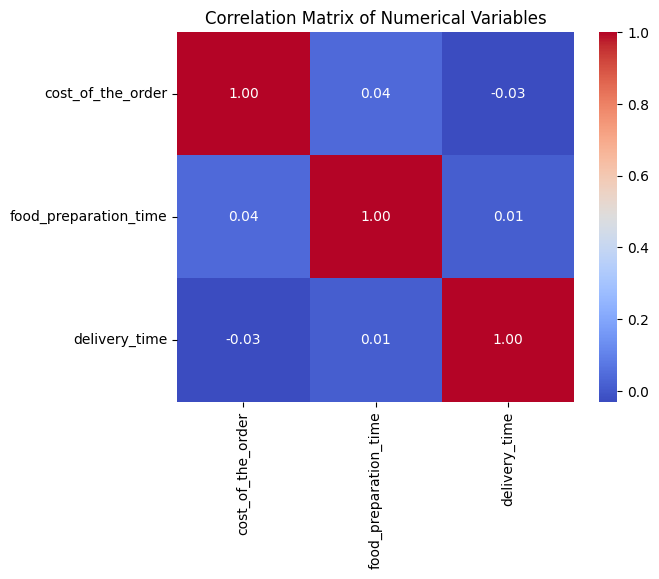

In [ ]:
# calculate the correlation matrix
corr = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

# heatmap for food_preparation_time, and delivery_time. this provides a visual representation of the correlation between these two
# heatmap helps identify whether there is any linear relationship between the numerical variables.
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

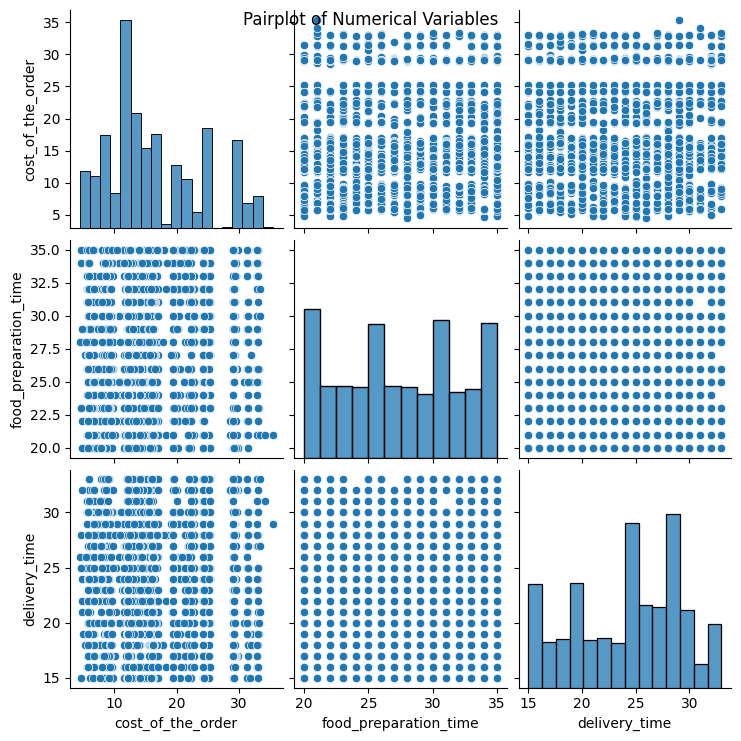

In [ ]:
# construct a pairplot. helps in visualizing the relationships between each pair of numerical variables in our dataset
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle('Pairplot of Numerical Variables', verticalalignment='top')
plt.show()

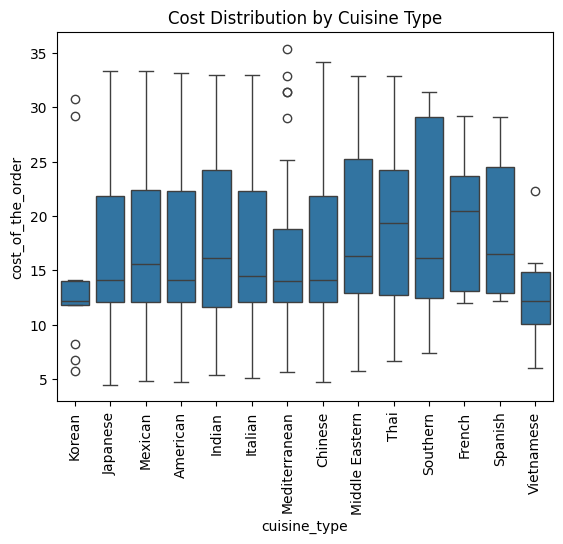

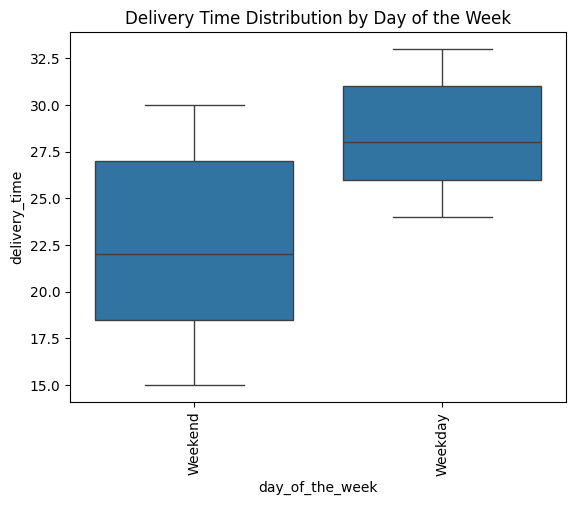

In [ ]:
# box plot for cuisine type and cost
# boxplots detect trends, outliers, and differences in distributions across different categories.
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost Distribution by Cuisine Type')
plt.xticks(rotation=90)
plt.show()
print('\n')
# Box plot for day of the week and delivery time
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time Distribution by Day of the Week')
plt.xticks(rotation=90)
plt.show()

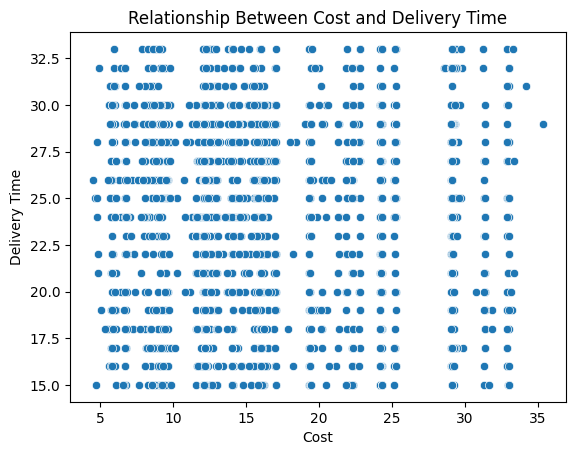

In [ ]:
# for a direct visualization of the relationship between two numerical variables like cost_of_the_order and delivery_time, scatterplots are very benificial
sns.scatterplot(x='cost_of_the_order', y='delivery_time', data=df)
plt.title('Relationship Between Cost and Delivery Time')
plt.xlabel('Cost')
plt.ylabel('Delivery Time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# convert 'Not given' to NaN in the rating column
df['rating'].replace('Not given', np.nan, inplace=True)

# convert the 'rating' column to all numeric, errors='coerce' will convert any remaining non-numeric values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# group data by restaurant and aggregate ratings. counts only non-NaN values.
# agg() is used to calculate both the count and the mean of ratings for each restaurant after grouping this dataframe by restaurant_name
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(count='count', mean='mean')

# filter to find restaurants that meet the requirements to get the offer
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# print the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


<ipython-input-32-5c29e8bc28e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace('Not given', np.nan, inplace=True)


#### Observations:
The companies or restaurants that have a rating count of more than 50 and average rating greater than 4 are the restaurants that will get a promotional offer for dvertisement. The restaurants are:

1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# function to calculate commission based on cost
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# apply the function to the cost column to create a new commission column
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# calculate the total commission or net revenue here
total_revenue = df['commission'].sum()

# print the total net revenue
print(f"The net revenue generated by the company from all orders is: ${total_revenue:.2f}")

The net revenue generated by the company from all orders is: $6166.30


#### Observations:
The net revenue generated by the company across all orders is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# calculate total delivery time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# determine the number of orders that took more than 60 minutes
orders_over_60 = df[df['total_delivery_time'] > 60].shape[0]

# calculate the total number of orders
total_orders = df.shape[0]

# calculate the percentage of orders that took more than 60 minutes
percentage_over_60 = (orders_over_60 / total_orders) * 100

# print the result
print(f"Percentage of orders taking more than 60 minutes from time ordered till getting delivered is: {percentage_over_60:.2f}%")

Percentage of orders taking more than 60 minutes from time ordered till getting delivered is: 10.54%


#### Observations:
The percentage of orders taking more than 60 minutes to get delivered from the time the order is placed (preparation_time + delivery_time) is: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# group data by 'day_of_the_week' and calculate the mean delivery time for each group
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()

# print the mean delivery times for weekdays and weekends
print("Mean Delivery Times:")
print(mean_delivery_times)

Mean Delivery Times:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


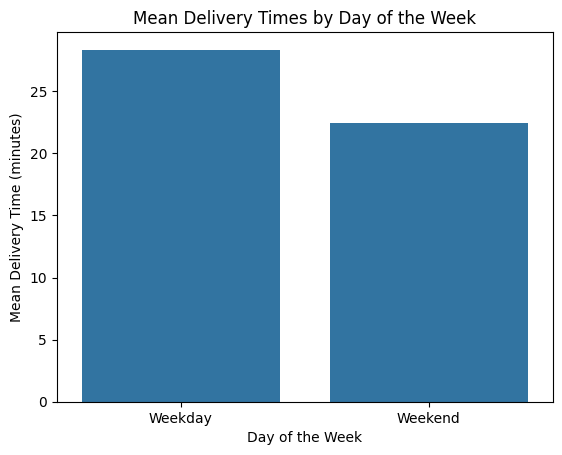

In [ ]:
# plot for the mean of delivery times
sns.barplot(x=mean_delivery_times.index, y=mean_delivery_times.values)
plt.title('Mean Delivery Times by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.show()

#### Observations:
The delivery time of the orders on weekends and weekdays is 22.47 and 28.34 respectively. This mean is higher on the weekends and which can be explained by how busier restaurants are during weekends compared to weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Cuisine Type: American, Italian, and Japanese cuisines are the most popular, indicating a diverse preference among the customers. This suggests that these cuisines drive a significant portion of the order volume.

* Delivery Times: The analysis revealed that the mean delivery time on weekends is slightly higher than on weekdays, suggesting operational strain or increased demand during weekends.

*	Customer Loyalty: A small group of customers places orders more frequently than others. This highlights the potential for implementing targeted loyalty programs.

*	Rating Impact: Restaurants with higher ratings tend to have more orders, underscoring the importance of customer satisfaction. Additionally, restaurants fulfilling the promotional offer criteria (more than 50 ratings and an average rating above 4) are poised to attract more customers.


*	Revenue Insights: The analysis on revenue generation from different order costs showed that orders above $20 contribute significantly to the company's revenue, emphasizing the importance of attracting higher-value orders.


*	Total Delivery Time: A noteworthy percentage of orders take over 60 minutes to deliver, indicating room for improvement in the delivery process to enhance customer satisfaction.


### Recommendations:

*	Targeted Promotions for Popular Cuisines: Develop marketing campaigns focusing on American, Italian, and Japanese cuisines. Collaborate with restaurants offering these cuisines for exclusive deals or discounts to attract more customers.

*	Weekend Delivery Optimization: Analyze the delivery process to identify bottlenecks causing delays on weekends. Consider strategies like increasing the number of delivery personnel or using AI-driven route optimization tools.


*	Loyalty Program Enhancement: Design personalized loyalty programs for frequent customers, offering rewards such as discounts, free delivery, or exclusive access to new menu items from top-rated restaurants.

*	Quality Improvement Initiatives: Work closely with restaurants that have potential but lower ratings to improve their offerings. This could include quality assurance programs, customer feedback analysis, and operational support.


*	High-Value Order Incentives: Create incentives for customers to place higher-value orders, such as tiered rewards or bundling popular items at a discounted rate. Analyze order data to identify popular items that can be bundled together.

*	Delivery Time Reduction: Invest in technology or partnerships that can reduce preparation and delivery times, particularly for orders taking longer than 60 minutes. This could include real-time tracking systems for more efficient order dispatching and delivery.


*	Feedback Loop: Establish a robust feedback loop with both customers and restaurant partners to continuously monitor and improve food quality, delivery times, and overall service.


---